---
# DS3000A - DS9000A Midterm Exam

## Student ID #: XXXXXXXXX

## Grade: __ / 100

## General Comments

-   This exam integrates knowledge and skills acquired in the first half of the semester. You are allowed to use any document and source on your computer and look up documents on the internet, but you are NOT allowed to share documents, post questions to online forums, or communicate in any way with people inside or outside the class, . 

-   Having open any document sharing or communication tool (e.g. Discord, Teams, Outlook, Google Drive etc.) either web-based or app-based on your laptop (or having them running in the background) is considered act of cheating and you will receive 0 pts for the exam.

-   To finish the midterm in the alloted time, you will have to work efficiently. Read the entirety of each question carefully.

-   You need to submit the midterm by 6:15PM on OWL to the Test and Quizzes section, where you downloaded the notebook and data. Late submission will be scored with 0 pts. To avoid technical difficulties, start your submission, at the latest, five to ten minutes before the deadline.  

-   Some questions demand a **written answer** - answer these in a full English sentence in their allocated markdown cells. 

-   For your figures, ensure that all axes are labeled in an informative way. In order to interpret, there can be a situation where you should limit the x-axis and/or y-axis to zoom-in.

-   Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting to OWL. 

## Additional Guidance

-   If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to those assumptions.
-   If you have no clue how to approach a question, skip it and move on. Revisit the skipped one(s) after you are done with other questions.

---
## Preliminaries
Feel free to add stuff to Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import scipy.stats as ss
import seaborn as sns
from math import pi
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, roc_curve, auc, RocCurveDisplay, roc_auc_score, accuracy_score, classification_report#, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
seed=1110
np.random.seed(seed)

---
## Question 1 - Hardcode Linear Regression <span style="color:green">[10 marks]</span>

### Q 1.1 - <span style="color:red">[0.5]</span> - Load `q1q2.csv` as pandas dataframe (name it `df1`) and show its first 5 rows.

In [3]:
df1 = pd.read_csv("q1q2.csv")
df1.head()

,x1,y1,x2,y2
0,-5.000000,-24.598243,10.000000,16.078992
1,-4.924623,-12.399073,10.100503,11.607512
2,-4.849246,-7.797257,10.201005,15.694078
3,-4.773869,-33.047786,10.301508,17.470684
4,-4.698492,-12.686326,10.402010,14.867190


### Q 1.2 - <span style="color:red">[0.5]</span> - Use an appropriate plotting command to see the relationship between `x1` and `y1`.

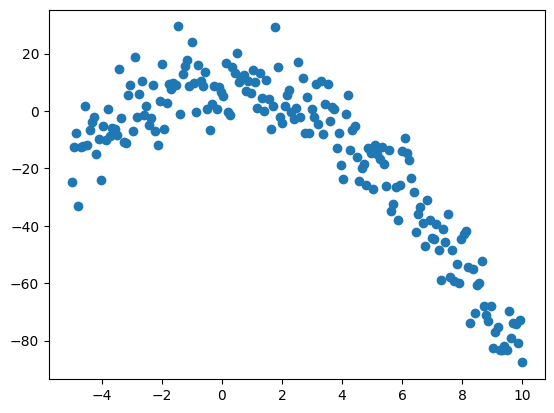

In [4]:
plt.scatter(df1.x1, df1.y1)
plt.show()

### Q 1.3 - <span style="color:red">[5]</span> - Hardcode OLS linear regression. You need at least two functions:
-   A loss function (name it `Loss`): Takes `(b, X, y)` as input arguments, calculates OLS cost function, and `return`s the calculated values. Note that this function must `return` only one variable which is a 1D array consisting of the calculated values. <span style="color:red">[2]</span>
-   A fitting function (name it `Fit`): Takes `(X, y, lossfcn=Loss)` as input arguments and returns two variables i.e. estimated betas and R-squared. This function must use `scipy.optimize.minimize` to minimize the `Loss` function. <span style="color:red">[3]</span> 

In [5]:
def Loss(b, X, y):
    predY = np.dot(X, b)
    res = y-predY
    c = sum(res**2)
    return c # must only return the calculated values of the cost function (here called `c`)

def Fit(X, y, lossfcn=Loss):
    _, ncols = X.shape
    betas = np.zeros((ncols, 1))
    RES = sc.optimize.minimize(lossfcn, betas, args=(X, y), jac=False)
    estimated_betas = RES.x 
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS = lossfcn(estimated_betas, X, y)
    R2 = 1-RSS/TSS 
    return (estimated_betas, R2)

### Q 1.4 - <span style="color:red">[1]</span> - Do these:
-   Construct a target `y` using `y1`, and a feature matrix `X_a` using `x1` without any feature transformation. <span style="color:red">[0.25]</span>
-   Use `X_a` and `y` and call `Fit` to fit your model. <span style="color:red">[0.25]</span>
-   What is training R-squared of this model? <span style="color:red">[0.5]</span>

In [6]:
X_a = np.c_[np.ones(df1.x1.size), df1.x1]
y = df1.y1.values
betas_a, R2 = Fit(X_a, y)
print("R-squared:", R2.round(4))

R-squared: 0.5715


/tmp/ipykernel_21161/2130850704.py:10: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = sc.optimize.minimize(lossfcn, betas, args=(X, y), jac=False)


### Q 1.5 - <span style="color:red">[2]</span> - Do these:
-   Construct a new feature matrix `X_b` using `x1` but this time also include a transformation of `x1` that you deem to best describe the relationship between `x1` and `y1`. Take a look at your plot of Q 1.2 and try to identify the relationship. <span style="color:red">[1]</span>
-   Use `X_b` and `y` and call `Fit` to fit your model <span style="color:red">[0.5]</span>
-   What is training R-squared of this model? <span style="color:red">[0.5]</span>

In [7]:
# guessed transformation
def gt(x): 
    return x**2

X_b = np.c_[np.ones(df1.x1.size), gt(df1.x1)]
betas_b, R2 = Fit(X_b, y)
print("R-squared:", R2.round(4))

R-squared: 0.9169


/tmp/ipykernel_21161/2130850704.py:10: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = sc.optimize.minimize(lossfcn, betas, args=(X, y), jac=False)


### Q 1.6 - <span style="color:red">[1]</span> - Use the given `xnew` below to construct two test design matrices i.e., one without any transformation (name it `X_new_a`) and one with the transformation identified in Q 1.5 (name it `X_new_b`). Make predictions for both. Plot these predictions and the original data points all together in one plot window.

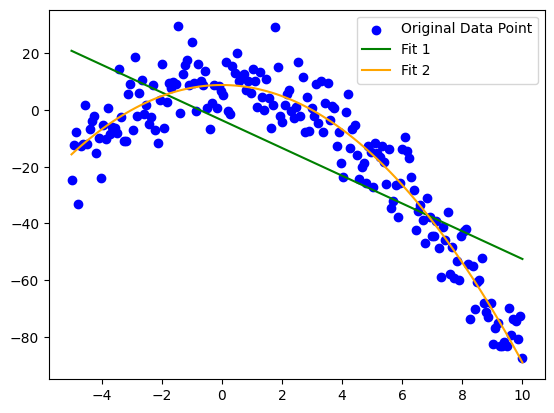

In [8]:
xnew = np.linspace(df1.x1.min(), df1.x1.max(), 100)

X_new_a = np.c_[np.ones(xnew.size), xnew]
X_new_b = np.c_[np.ones(xnew.size), gt(xnew)]

y_pred_a = X_new_a @ betas_a
y_pred_b = X_new_b @ betas_b

plt.scatter(df1.x1, df1.y1, c='blue', label='Original Data Point')
plt.plot(xnew, y_pred_a, c='green', label='Fit 1')
plt.plot(xnew, y_pred_b, c='orange', label='Fit 2')
plt.legend()
plt.show()

---
## Question 2 - Hardcode Maximum Likelihood Regression <span style="color:green">[20 marks]</span>

### Q 2.1 - <span style="color:red">[15]</span> - Code an OLS regression log likelihood using this probability density function:

$f_Y(y|X=x)=\dfrac{\pi}{3\sigma_{\epsilon}\sqrt{2\pi}}e^{-\dfrac{1}{2}\dfrac{(y-\mu_{Y})^2}{\sigma_{\epsilon}^2\sqrt{\pi}}}$

You can assume $\sigma_{\epsilon}$ to be the standard deviation of the noise in the data (hint: for which you can assume an arbitrary value but must be a valid one). You need to calculate the log likelihood of the PDF (_i.e._, $l(\mu_{Y},\sigma_{\epsilon}^2;y_1,...,y_n$)), and then choose the form of $\mu_{Y}$ using some assumptions that you make. You can start to code once you know the final form of the $l$ equation. You need to code at least two functions:
- one which takes in `(beta, X, y)`, calculates and `return`s $-l$. <span style="color:red">[12]</span>
- another one which takes in `(X, y, theFunctionFromThePreviousStep)` and makes use of `scipy.optimize.minimize` to minimize the previous function. This function `return`s the betas which maximize $l$. <span style="color:red">[3]</span>

In [9]:
def RegNegLogLikelihood(beta, X, y):
    mu = X@beta
    n = y.size
    sigma = 1
    l = n*np.log(pi) - n*np.log(3) - n*np.log(sigma) - (n/2)*np.log(2*pi) - (1/(2*np.sqrt(pi)*sigma*sigma))*np.sum((y-mu)**2)
    return -l

# Function to maximize regression log likelihood
def maximumRegLikelihood(X, y, negloglik=RegNegLogLikelihood):
    _, ncols = X.shape
    betas=np.zeros((ncols,1)) # initialize vector beta
    RES = sc.optimize.minimize(negloglik, betas, args=(X,y), method="Powell", tol=1e-8)
    return RES.x

### Q 2.2 - <span style="color:red">[0.5]</span> - Load `q1q2.csv` as pandas dataframe (name it `df2`) and show its first 5 rows.

In [10]:
df2 = pd.read_csv("q1q2.csv")
df2.head()

,x1,y1,x2,y2
0,-5.000000,-24.598243,10.000000,16.078992
1,-4.924623,-12.399073,10.100503,11.607512
2,-4.849246,-7.797257,10.201005,15.694078
3,-4.773869,-33.047786,10.301508,17.470684
4,-4.698492,-12.686326,10.402010,14.867190


### Q 2.3 - <span style="color:red">[3]</span> - Take `x2` as feature and `y2` as target. Fit the model. Use the given `x_new` (below) to make new predictions. Plot the original data points and the new predictions in the same plot window.

/tmp/ipykernel_21161/553534777.py:12: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = sc.optimize.minimize(negloglik, betas, args=(X,y), method="Powell", tol=1e-8)


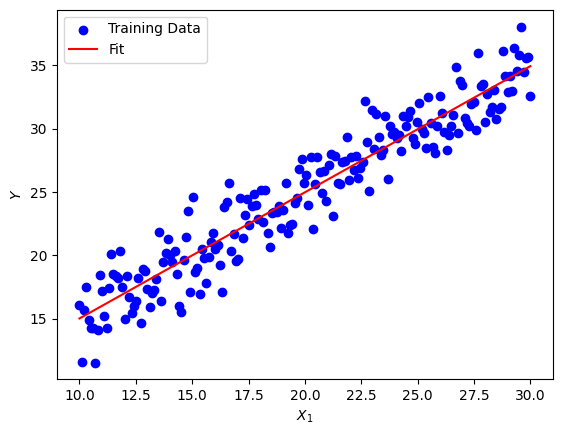

In [11]:
x_train = df2.x2.values
X_train = np.c_[np.ones(x_train.size), x_train]
y_train = df2.y2.values

betas = maximumRegLikelihood(X_train, y_train)

x_new = np.linspace(x_train.min(), x_train.max(), 200)
X_new = np.c_[np.ones(x_new.size), x_new]
y_predicted = X_new@betas

# plot
plt.scatter(x_train, y_train, c='blue', label='Training Data')
plt.plot(x_new, y_predicted, c='red', label='Fit')

plt.legend()
plt.xlabel("$X_1$")
plt.ylabel("$Y$")
plt.show()

### Q 2.4 - <span style="color:red">[1.5]</span> - Calculate training R-squared of your Maximum Likelihood Regression model.

In [202]:
# R-squared
r2 = r2_score(y_train, X_train@betas)
print('R-squared:', r2.round(4))

R-squared: 0.9084


---
## Question 3: An End-to-End DS Project <span style="color:green">[45 marks]</span>

You are going to work on a newly published dataset which lists soccer players participating in the FIFA World Cup 2022 - Qatar. Our ultimate goal is to train a linear regression model to predict monetary values of the players.

### Q 3.1 - <span style="color:red">[0.5]</span> - Load the dataset `q3.csv` as pandas dataframe and take a look at its first 5 rows.

In [107]:
data = pd.read_csv("q3.csv")
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,SUB,"Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,LCM,"Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,LB,"Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,RCM,"Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,RCM,"Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


### Q 3.2 - <span style="color:red">[1]</span> - What is the `Nationality`, `Wage`, `Value`, `Skill Moves`, `Overall` of `Cristiano Ronaldo` the player? 

In [108]:
player = 'Cristiano Ronaldo'
data[data.Name.str.contains(player)].get(["Name", "Nationality", "Wage", "Value", "Skill Moves", "Overall"])

,Name,Nationality,Wage,Value,Skill Moves,Overall
100,Cristiano Ronaldo,Portugal,€220K,€41M,5.0,90


### Q 3.3 - <span style="color:red">[4]</span> - The feature `Overall` indicates player's overall performance score, which normally ranges from 0 to 100. However, it seems the participating players in this FIFA World Cup all have `Overall` $>40$. Plot the smoothed distribution of `Overall`. Your plot must also include three vertical lines: one for mean, one for median, and one for 99.94th percentile of the distribution. Your plot must have a legend.

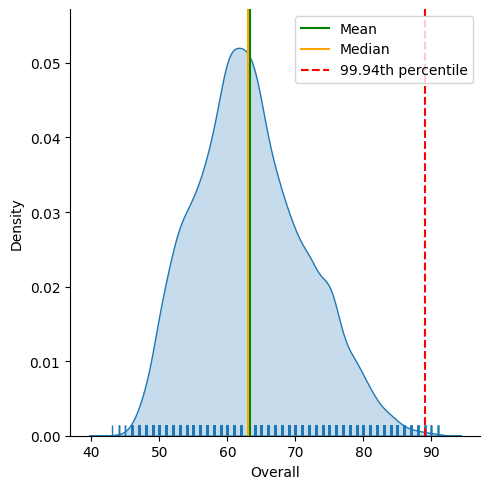

In [109]:
sns.displot(data.Overall, kind='kde', fill=True, rug = True)

plt.axvline(data.Overall.mean(), color='green', label='Mean')
plt.axvline(data.Overall.median(), color='orange', label='Median')

percentile = 99.94
quantile=percentile/100

plt.axvline(data.Overall.quantile(quantile), color='r', ls='--', label=str(percentile)+'th percentile')
plt.legend(loc='upper right')
plt.show()

### Q 3.4 - <span style="color:red">[2]</span> - What is `Name`, `Nationality`, `Wage`, `Value`, `Skill Moves`, and `Overall` of the top 0.06% players of the `Overall` distribution?  

In [110]:
print('Top players are:')
percentile = 100-0.06
quantile=percentile/100
data[data.Overall > data.Overall.quantile(quantile)].get(["Name", "Age", "Nationality", "Wage", "Value", "Position", "Overall"])

Top players are:


,Name,Age,Nationality,Wage,Value,Position,Overall
3,K. De Bruyne,31,Belgium,€350K,€107.5M,RCM,91
25,M. Salah,30,Egypt,€270K,€115.5M,RW,90
41,R. Lewandowski,33,Poland,€420K,€84M,ST,91
56,L. Messi,35,Argentina,€195K,€54M,RW,91
75,K. Mbappé,23,France,€230K,€190.5M,ST,91
100,Cristiano Ronaldo,37,Portugal,€220K,€41M,ST,90
124,K. Benzema,34,France,€450K,€64M,CF,91
192,V. van Dijk,30,Netherlands,€230K,€98M,LCB,90
9151,M. Neuer,36,Germany,€72K,€13.5M,GK,90
14357,T. Courtois,30,Belgium,€250K,€90M,GK,90


### Q 3.5 - <span style="color:red">[0.5]</span> - What features are in the dataset?

In [111]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

### Q 3.6 - <span style="color:red">[1]</span> - Some features such as `ID` and `Kit Number` are obviously irrelevant for player `Value` prediction and one would drop them. However, for the sake of time let's drop some more _i.e_, the following columns:

`ID`, `Name`, `Nationality`, `Photo`, `Flag`, `Club`, `Club Logo`, `Real Face`, `Joined`, `Loaned From`, `Contract Valid Until`, `Kit Number`, `Work Rate`, `Special`, `Release Clause`, `Best Overall Rating`

Show the first 5 rows after the drop.

In [112]:
# Drop
data.drop(['ID', 'Name', 'Nationality', 'Photo', 'Flag', 'Club', 'Club Logo', 'Real Face', \
           'Joined', 'Loaned From', 'Contract Valid Until', 'Kit Number', \
            'Work Rate','Special','Release Clause','Best Overall Rating'], axis=1, inplace=True)

In [113]:
data.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,87,88,€91M,€115K,Right,4.0,4.0,3.0,Unique,SUB,189cm,82kg
1,27,86,87,€78.5M,€190K,Right,3.0,3.0,4.0,Unique,LCM,179cm,69kg
2,30,85,85,€46.5M,€46K,Left,2.0,3.0,3.0,Stocky (170-185),LB,172cm,69kg
3,31,91,91,€107.5M,€350K,Right,4.0,5.0,4.0,Unique,RCM,181cm,70kg
4,25,86,89,€89.5M,€110K,Right,3.0,3.0,3.0,Normal (170-),RCM,172cm,68kg


In [114]:
data.info()
# note that we do see some mulls, let them be for now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17660 non-null  int64  
 1   Overall                   17660 non-null  int64  
 2   Potential                 17660 non-null  int64  
 3   Value                     17660 non-null  object 
 4   Wage                      17660 non-null  object 
 5   Preferred Foot            17660 non-null  object 
 6   International Reputation  17660 non-null  float64
 7   Weak Foot                 17660 non-null  float64
 8   Skill Moves               17660 non-null  float64
 9   Body Type                 17622 non-null  object 
 10  Position                  17625 non-null  object 
 11  Height                    17660 non-null  object 
 12  Weight                    17660 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 1.8+ MB


### Q 3.7 - <span style="color:red">[2]</span> - Now let's do some data cleaning on `Height` and `Weight`:

`Height` and `Weight` are categorical. But we need numbers. First, remove any possible white spaces from their entries using `data['column_name'] = data['column_name'].str.replace(' ', '_')`. Second, eliminate "cm" and "kg" from their entries. Third, convert their types to numerical.   

In [115]:
data['Height'] = data['Height'].str.replace(' ', '_')
data['Height'] = data['Height'].str.replace('cm', '').astype(int)

data['Weight'] = data['Weight'].str.replace(' ', '_')
data['Weight'] = data['Weight'].str.replace('kg', '').astype(int)

### Q 3.8 - <span style="color:red">[4]</span> - Now let's do some data cleaning on `Value` and `Wage`:

-   Remove white spaces
-   Drop the "€" symbol from their entries
-   You should have realized that some contain a "K" and some contain an "M". We need to first store their corresponding indices before removing "K" and "M". Because after removing and conversion to numerical, you then want to multiply "K" entries by 1e+3 and "M" entries by 1e+6.

There are many ways to achieve these steps. And, it does not matter how you do as long as outputs are correct. For example, for the multiplication part one can do:
`data.loc[K_indices, ColumnName] = data[ColumnName].apply(lambda x: x*1e+3)`


In [116]:
monetary = ['Value','Wage']
for c in monetary:
    data[c] = data[c].str.replace(' ', '_')
    data[c] = data[c].str.replace('€', '')
    ind_K = data[data[c].str.contains('K', regex=False)].index
    ind_M = data[data[c].str.contains('M', regex=False)].index
    data[c] = data[c].str.replace('K', '')
    data[c] = data[c].str.replace('M', '')
    data[c] = data[c].astype(float)

    data.loc[ind_K, c] = data[c].apply(lambda x: x*1e+3)
    data.loc[ind_M, c] = data[c].apply(lambda x: x*1e+6)

In [117]:
data.head()

,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,87,88,91000000.0,115000.0,Right,4.0,4.0,3.0,Unique,SUB,189,82
1,27,86,87,78500000.0,190000.0,Right,3.0,3.0,4.0,Unique,LCM,179,69
2,30,85,85,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky (170-185),LB,172,69
3,31,91,91,107500000.0,350000.0,Right,4.0,5.0,4.0,Unique,RCM,181,70
4,25,86,89,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal (170-),RCM,172,68


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17660 non-null  int64  
 1   Overall                   17660 non-null  int64  
 2   Potential                 17660 non-null  int64  
 3   Value                     17660 non-null  float64
 4   Wage                      17660 non-null  float64
 5   Preferred Foot            17660 non-null  object 
 6   International Reputation  17660 non-null  float64
 7   Weak Foot                 17660 non-null  float64
 8   Skill Moves               17660 non-null  float64
 9   Body Type                 17622 non-null  object 
 10  Position                  17625 non-null  object 
 11  Height                    17660 non-null  int64  
 12  Weight                    17660 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.8+ MB


### Q 3.9 - <span style="color:red">[2]</span> - Now use the pandas `describe()` to get a statistical summary of the data. Do you spot any suspicious "min" values? If yes, explain why they are suspicious and replace them; also explain your choice of value for the replacement of those.  

In [119]:
data.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,17660.000000,17660.000000,17660.000000,1.766000e+04,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000
mean,23.127746,63.369592,70.981200,2.739788e+06,8189.807475,1.106285,2.900340,2.297169,180.893431,74.326161
std,4.639821,8.036268,6.529836,7.841276e+06,20476.733001,0.407021,0.663523,0.754264,6.962486,6.982741
min,15.000000,43.000000,42.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,149.000000,48.000000
25%,20.000000,58.000000,67.000000,3.250000e+05,550.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,22.000000,63.000000,71.000000,7.000000e+05,2000.000000,1.000000,3.000000,2.000000,181.000000,74.000000
75%,26.000000,69.000000,75.000000,1.725000e+06,6000.000000,1.000000,3.000000,3.000000,186.000000,79.000000
max,54.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,110.000000


In [120]:
attributes = ['Wage','Value']
rmn = [pd.DataFrame.mean.__name__, pd.DataFrame.median.__name__]

for a in attributes:
    c1 = data[a].replace(0.0, data[a].mean())
    c2 = data[a].replace(0.0, data[a].median())
    print('\n============ '+a)
    for name, c in zip(rmn,[c1,c2]): 
        print('Distance using {} for replacement:'.format(name), abs(c.mean()-c.median()))


============ Wage
Distance using mean for replacement: 6315.019706575315
Distance using median for replacement: 6220.385050962628

============ Value
Distance using mean for replacement: 2058693.268113953
Distance using median for replacement: 2051005.832389581


In [121]:
# Replacing with median results in smaller distances. Let's do it:
data['Value'] = data['Value'].replace(0.0, data['Value'].median())
data['Wage'] = data['Wage'].replace(0.0, data['Wage'].median())

### Q 3.10 - <span style="color:red">[1]</span> - Drop any NA values from the data.

In [122]:
data = data.dropna(inplace=False)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17591 entries, 0 to 17659
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17591 non-null  int64  
 1   Overall                   17591 non-null  int64  
 2   Potential                 17591 non-null  int64  
 3   Value                     17591 non-null  float64
 4   Wage                      17591 non-null  float64
 5   Preferred Foot            17591 non-null  object 
 6   International Reputation  17591 non-null  float64
 7   Weak Foot                 17591 non-null  float64
 8   Skill Moves               17591 non-null  float64
 9   Body Type                 17591 non-null  object 
 10  Position                  17591 non-null  object 
 11  Height                    17591 non-null  int64  
 12  Weight                    17591 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1.9+ MB


### Q 3.11 - <span style="color:red">[3]</span> - Let's look at statistical significance of the labels within each categorical feature. Here we take 4% as the threshold for statistical significance. Use your judgment for regrouping of the labels where needed. Below is how I would do it for `Position`. You do the rest.

In [124]:
cat = 'Position'
name = 'Back';    data[cat].replace({'GK':name, 'CB':name, 'RCB':name, 'LCB':name, 'LB':name, 'RB':name, 'RWB':name, 'LWB':name, 'LW':name, 'RW':name}, inplace=True)
name = 'Middle';  data[cat].replace({'RM':name, 'LM':name, 'RCM':name, 'LCM':name, 'RDM':name, 'LDM':name, 'CM':name, 'LAM':name, 'RAM':name, 'CDM':name, 'CAM':name}, inplace=True)
name = 'Forward'; data[cat].replace({'ST':name, 'LF':name, 'RF':name, 'CF':name, 'RS':name, 'LS':name}, inplace=True)
name = 'Reserve'; data[cat].replace({'SUB':name, 'RES':name}, inplace=True)
((data[cat].value_counts()/data[cat].value_counts().sum())*100)

Reserve    71.803763
Back       13.813882
Middle     10.340515
Forward     4.041840
Name: Position, dtype: float64

In [125]:
cat = 'Preferred Foot'
((data[cat].value_counts() / data[cat].value_counts().sum())*100)
# all already good

Right    77.261099
Left     22.738901
Name: Preferred Foot, dtype: float64

In [126]:
cat = 'Body Type'
data[cat].replace({'Lean (170-)':'Lean', 'Lean (170-185)':'Lean', 'Lean (185+)':'Lean'}, inplace=True)
data[cat].replace({'Normal (170-)':'Normal', 'Normal (170-185)':'Normal', 'Normal (185+)':'Normal'}, inplace=True)
data[cat].replace({'Stocky (170-)':'Stocky', 'Stocky (170-185)':'Stocky', 'Stocky (185+)':'Stocky', 'Unique':'Stocky'}, inplace=True)
((data[cat].value_counts() / data[cat].value_counts().sum())*100)
# now all good

Normal    59.064294
Lean      35.825138
Stocky     5.110568
Name: Body Type, dtype: float64

In [127]:
data.select_dtypes(exclude='number').nunique()

Preferred Foot    2
Body Type         3
Position          4
dtype: int64

### Q 3.12 - <span style="color:red">[1]</span> - Now perform one hot encoding to prepare our categorical values for linear regression. Store the encoded dataset under the name `df3`

In [128]:
df3 = pd.get_dummies(data, drop_first=True)
df3.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Preferred Foot_Right', 'Body Type_Normal',
       'Body Type_Stocky', 'Position_Forward', 'Position_Middle',
       'Position_Reserve'],
      dtype='object')

### Q 3.13 - <span style="color:red">[2]</span> - Use `seaborn.jointplot` to investigate the relationship between `Overall` vs `Value` as well as `Wage` vs `Value`.

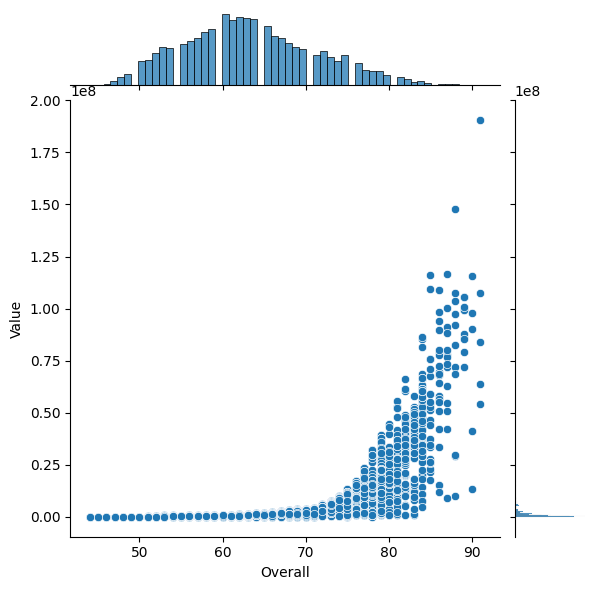

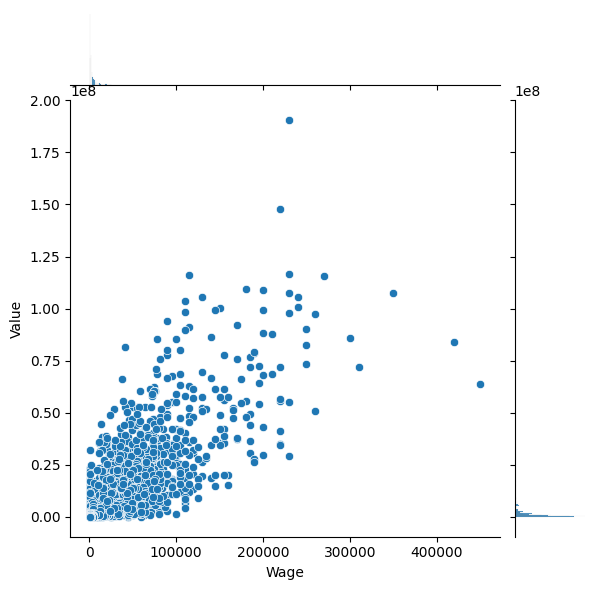

In [129]:
for a in ['Overall' , 'Wage']:
    ax = sns.jointplot(x=df3[a], y=df3.Value, kind='scatter') # ,kind='kde',fill=True)
    ax.ax_joint.set_xlabel(a)
    ax.ax_joint.set_ylabel('Value')
    plt.show()

### Q 3.14 - <span style="color:red">[4]</span> - Where applicable, apply proper transformation on either `Overall`, `Wage`, or `Value` to make them better fit the assumptions of linear regression. Joinplot the transformed versions before proceeding

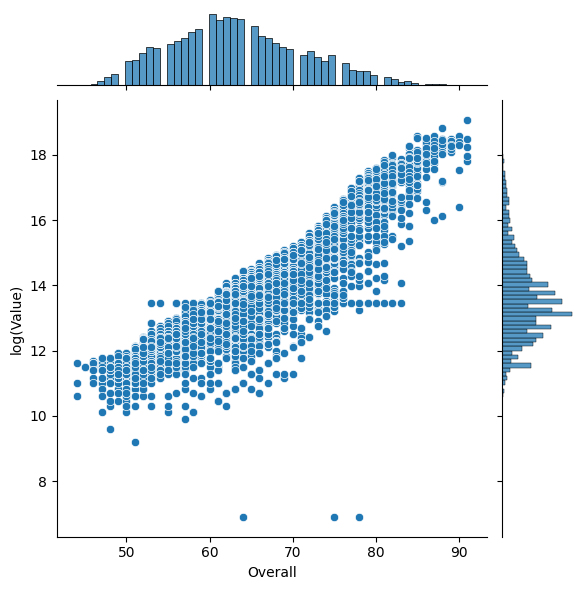

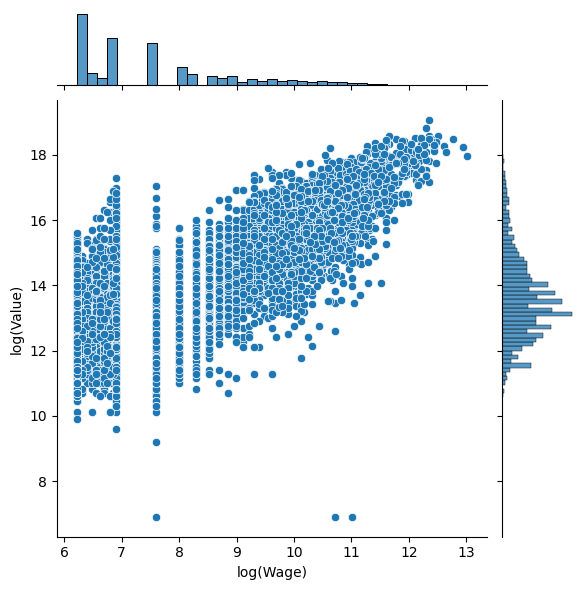

In [130]:
ax = sns.jointplot(x=df3.Overall, y=np.log(df3.Value), kind='scatter')
ax.ax_joint.set_xlabel('Overall')
ax.ax_joint.set_ylabel('log(Value)')
plt.show()

ax = sns.jointplot(x=np.log(df3.Wage), y=np.log(df3.Value), kind='scatter') # ,kind='kde',fill=True)
ax.ax_joint.set_xlabel('log(Wage)')
ax.ax_joint.set_ylabel('log(Value)')
plt.show()

### Q 3.15 - <span style="color:red">[2]</span> - Add the the transformed variables to the dataframe `df3` as new columns.

In [131]:
df3['LogValue'] = np.log(df3.Value)
df3['LogWage'] = np.log(df3.Wage)

### Q 3.16 - <span style="color:red">[2]</span> - Use heatmap to study the pairwise correlations of all the variables in `df3`. In one or two sentences tell where you see two or three strong correlations.

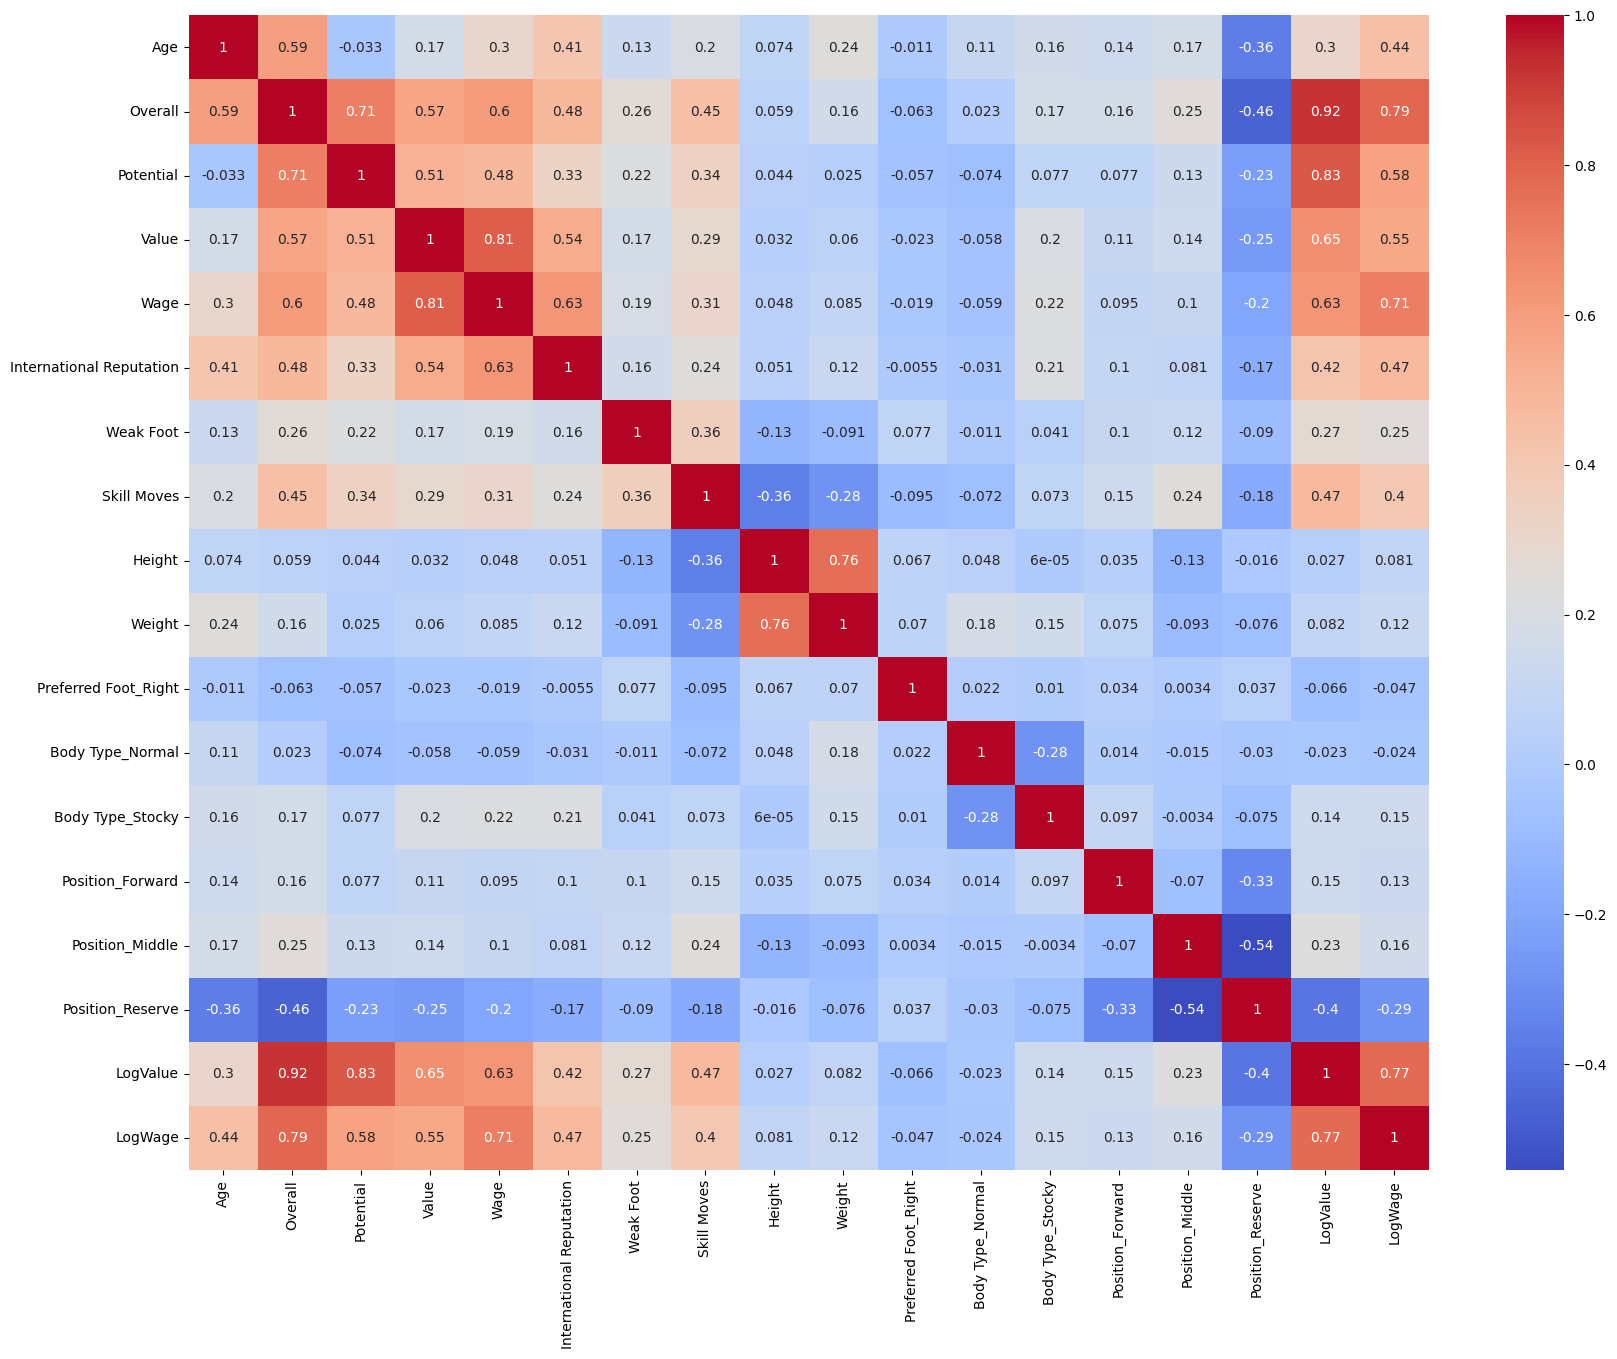

In [132]:
c = df3.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()

### Extra 1 - [0]

In [133]:
# This cell was not part of the asking - including it as an FYI

print("Correlations between features and target (i.e., LogValue) are:")
print(c.drop(c.iloc[[3, 4, 16]].index)["LogValue"].sort_values(ascending=True).round(2)) # Excluding Value (3), Wage (4), and LogValue (16)

Correlations between features and target (i.e., LogValue) are:
Position_Reserve           -0.40
Preferred Foot_Right       -0.07
Body Type_Normal           -0.02
Height                      0.03
Weight                      0.08
Body Type_Stocky            0.14
Position_Forward            0.15
Position_Middle             0.23
Weak Foot                   0.27
Age                         0.30
International Reputation    0.42
Skill Moves                 0.47
LogWage                     0.77
Potential                   0.83
Overall                     0.92
Name: LogValue, dtype: float64


### Q 3.17 - <span style="color:red">[8]</span> - Let's train a model to predict player value using all features in `df3` except some (you tell):
- Use RMSE as your scorer <span style="color:red">[1]</span>
- Split `df3` to train and test with `test_size=0.2, random_state=seed` <span style="color:red">[2]</span>
- Pick `LinearRegression()` from sklearn as your model <span style="color:red">[1]</span>
- Do 5-split Kfold cross-validation with shuffling and report the cross-validated RMSE of each split as well as their mean and standard deviation <span style="color:red">[2]</span>
- Report both prediction and generalization RMSE of your model <span style="color:red">[2]</span>

In [134]:
df3.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle,Position_Reserve,LogValue,LogWage
0,27,87,88,91000000.0,115000.0,4.0,4.0,3.0,189,82,1,0,1,0,0,1,18.326370,11.652687
1,27,86,87,78500000.0,190000.0,3.0,3.0,4.0,179,69,1,0,1,0,1,0,18.178609,12.154779
2,30,85,85,46500000.0,46000.0,2.0,3.0,3.0,172,69,0,0,1,0,0,0,17.654963,10.736397
3,31,91,91,107500000.0,350000.0,4.0,5.0,4.0,181,70,1,0,1,0,1,0,18.493001,12.765688
4,25,86,89,89500000.0,110000.0,3.0,3.0,3.0,172,68,1,1,0,0,1,0,18.309749,11.608236


In [135]:
def rmse(y,ypr):
    return np.sqrt(mean_squared_error(y, ypr, squared=True))
    
# or

def rmse(y,ypr):
    return mean_squared_error(y, ypr, squared=False)

In [168]:
# If you want data to be in the form of dataframe
X = df3.drop(['Value', 'Wage', 'LogValue'], axis=1)
y = df3.LogValue

# # If you want data to be in the form of array
# X = df3.drop(['Value', 'Wage', 'LogValue'], axis=1).values
# y = df3.LogValue.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

In [137]:
LR  = LinearRegression()

# KFold cross-validated loss with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_scores = cross_val_score(LR, Xtrain, ytrain, cv=kf, scoring=make_scorer(rmse))

print(f'List of CV losses:', cv_scores.round(3))
print(f"Average CV loss: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

List of CV losses: [0.319 0.294 0.304 0.292 0.284]
Average CV loss: 0.298 +/- 0.012


In [138]:
model  = LinearRegression().fit(Xtrain, ytrain)
print("Training RMSE: %.3f" % rmse(ytrain, model.predict(Xtrain)))

Loss_Test = rmse(ytest, model.predict(Xtest))
print('Generalization RMSE:', Loss_Test.round(3))

Training RMSE: 0.298
Generalization RMSE: 0.317


### Q 3.18 - <span style="color:red">[1]</span> - What value your model predict for player L. Messi

In [139]:
i = 56 # choose a player (56 for L. Messi - we know this from Question 3.4)
y_true = y[i]

# if X is dataframe
y_pred = model.predict([X.iloc[i]]) 

# # if X is array
# y_pred = model.predict(X[i].reshape(1, -1))

print('True value:      €{}'.format(np.exp(y_true).round(0)))
print('Predicted value: €{}'.format(np.exp(y_pred[0]).round(0)))

# Don't be disappointed with this prediction. In general, you do not
# expect an ML model to make reliable prediction for the outliers.
# However, this is pretty good given the simplicity of our model.

True value:      €54000000.0
Predicted value: €65203879.0


/home/alireza/my_py_env/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Q 3.19 - <span style="color:red">[4]</span> - Let's calculate a confidence interval (based on 95% confidence level) for **mean** `Value` by bootstrapping. For this purpose, code a function that takes as input arguments (`model`, `Xtrain`, `ytrain`, `Xtest`, `numboot=100`), and in each iteration, it bootstrap samples from the training set to fit the input model and uses the test set to make predictions. The function must return only one object that is the dataframe (or array) of the recorded values of the bootstrap statistic. 

Depending on your approach to code the function, you may or may not need a command to combine and convert arrays to dataframe; if you do, here is one way to do it:

`data = pd.DataFrame.from_records(np.c_[A, B])`

Code the function, call it, and report the CI. (For `numboot`, use the function's default value.)

In [140]:
# Version 1: if the type of Xtrain, Xtest, ytrain, ytest is pandas.core.frame.DataFrame
def BootstrapPred(MODEL, X_train, y_train, X_test, numboot=100):
    y_pred = np.zeros(numboot)
    for i in range(numboot):
        X_fit = X_train.sample(Xtrain.shape[0], replace=True)
        y_fit = y_train[X_fit.index]
        y_pred[i]=np.exp(MODEL.fit(X_fit, y_fit).predict(X_test)).mean() # record bootstrap statistic
    return y_pred

# # Version 2: if the type of Xtrain, Xtest, ytrain, ytest is numpy.ndarray
# def BootstrapPred(MODEL, X_train, y_train, X_test, numboot=100):
#     data = pd.DataFrame.from_records(np.c_[X_train, y_train])
#     m = data.shape[0]
#     n = data.shape[1]
#     y_pred = np.zeros(numboot)
#     for i in range(numboot):
#         d = data.sample(m, replace=True)
#         X_fit = d.drop([n-1], axis=1).values # drop last column
#         y_fit = d.iloc[:, n-1].values        # choose only the last column
#         y_pred[i]=np.exp(MODEL.fit(X_fit, y_fit).predict(X_test)).mean()
#     return y_pred

In [141]:
yhat_s         = np.exp(model.fit(Xtrain, ytrain).predict(Xtest))
mean_yhat_boot = BootstrapPred(model, Xtrain, ytrain, Xtest)

In [152]:
# Bootstrap with CL of 95%
cl = 95/100 

p_1 = (1-cl)/2
p_2 = 1-p_1

boot_quant = np.quantile( mean_yhat_boot - yhat_s.mean(), [p_1, p_2] )

boot_ci = [ ((yhat_s.mean() - boot_quant[1])*1e-6).round(3), 
            ((yhat_s.mean() - boot_quant[0])*1e-6).round(3) ]

print("Boot confidence interval is",boot_ci,'- in million euros.')

Boot confidence interval is [2.373, 2.442] - in million euros.


### Extra 2 - [0]

In [153]:
# This cell was not part of the asking - including it as an FYI

# Calculate CI using CLT:
stderr = yhat_s.std() / np.sqrt(yhat_s.shape[0])
lower = yhat_s.mean() - ss.norm.ppf(cl) * stderr
upper = yhat_s.mean() + ss.norm.ppf(cl) * stderr

print('The confidence interval is [%.3f, %.3f] - in million euros.' % (lower*1e-6, upper*1e-6))

The confidence interval is [2.241, 2.581] - in million euros.


### Extra 3 - [0]

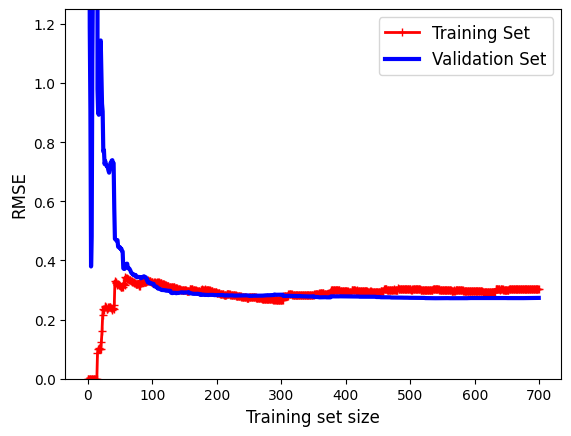

In [190]:
# This cell was not part of the asking - including it as an FYI

# Plot training and validation learning curves:
def plot_learning_curves(model, X, y, ts, seed=seed):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ts, random_state=seed)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
    plt.legend(loc="upper right", fontsize=12)
    plt.xlabel("Training set size", fontsize=12)
    plt.ylabel("RMSE", fontsize=12)


n=1000
validation_set_size = 0.3
plot_learning_curves(model, \
                     Xtrain.sample(n, replace=False, random_state=seed), \
                     ytrain[Xtrain.sample(n, replace=False, random_state=seed).index], \
                     validation_set_size)

plt.ylim([0, 1.25])
plt.show()
# Is this overfitting or underfitting?

---
## Question 4: Classification <span style="color:green">[25 marks]</span>

We want to classify players based on preferred foot (_i.e._, left or right)

### Q 4.1 - <span style="color:red">[0.5]</span> - Load `q4.csv` as pandas dataframe.

In [191]:
df4 = pd.read_csv("q4.csv")
df4.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Height,Weight,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle,Position_Reserve,LogValue,LogWage
0,27,87,88,4.0,4.0,3.0,189,82,1,0,1,0,0,1,18.326370,11.652687
1,27,86,87,3.0,3.0,4.0,179,69,1,0,1,0,1,0,18.178609,12.154779
2,30,85,85,2.0,3.0,3.0,172,69,0,0,1,0,0,0,17.654963,10.736397
3,31,91,91,4.0,5.0,4.0,181,70,1,0,1,0,1,0,18.493001,12.765688
4,25,86,89,3.0,3.0,3.0,172,68,1,1,0,0,1,0,18.309749,11.608236


### Q 4.2 - <span style="color:red">[2.5]</span> - Are the classes balanced or imbalanced?

In [192]:
cat = 'Preferred Foot_Right'
((df4[cat].value_counts() / df4[cat].value_counts().sum())*100)

1    77.261099
0    22.738901
Name: Preferred Foot_Right, dtype: float64

### Q 4.3 - <span style="color:red">[3]</span> - What would be the baseline accuracy of such classifier and what does this mean?

In [193]:
right = 1 # major class
left = 0

count = df4['Preferred Foot_Right'].value_counts()

baseline_accuracy = count[right]/(count[right]+count[left])
print("Baseline Accuracy is:", baseline_accuracy)

Baseline Accuracy is: 0.7726109942584276


### Q 4.4 - <span style="color:red">[9]</span> - Let's train a classifier:
-   Split `df4` to train and test with `test_size=0.2, random_state=seed` <span style="color:red">[2]</span>
-   Use sklearn's `LogisticRegression()` with Ridge as penalty and regularization strength of 50 and `max_iter=1000`. <span style="color:red">[2]</span>
-   Do you need any preprocessing? If so, bundle them into a pipeline. <span style="color:red">[3]</span>
-   Plot ROC and report AUC? Interpret them in one or two sentences. <span style="color:red">[2]</span>

In [194]:
X = df4.drop(['Preferred Foot_Right'], axis='columns')
y = df4['Preferred Foot_Right']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

In [195]:
regularization_strength = 50
c = 1/regularization_strength
LReg = LogisticRegression(penalty='l2', random_state=seed, max_iter=1000, C=c, n_jobs=-1, class_weight=None)

# You would not need standardization if just using the default solver. Looking at the documentation at:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# you realize that the default solver for Ridge penalty is 'lbfgs'. And if you look up the solvers properties at:
# https://scikit-learn.org/stable/modules/linear_model.html
# you realize that 'lbfgs' is robust to unscaled datasets. If still want to do it here it is:
# pipe = Pipeline(steps=[('Standardize', StandardScaler()), ('Logistic', LReg)])

pipe = Pipeline(steps=[('Logistic', LReg)])

pipe_model = pipe.fit(Xtrain, ytrain)

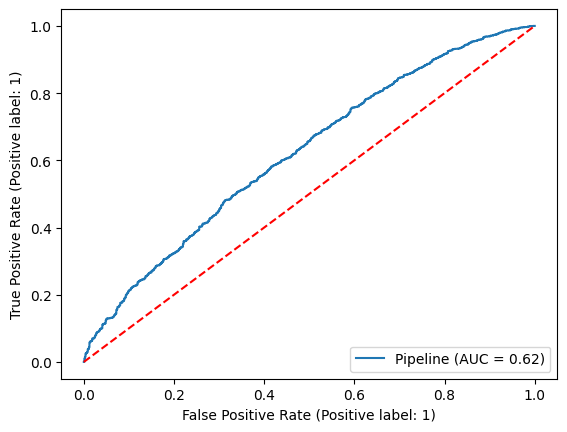

In [196]:
## Plot receiver operating characteristic curve (ROC)

# fpr, tpr, thresholds = roc_curve(ytest, pipe.predict_proba(Xtest)[:,1], pos_label=pipe.classes_[1])
# RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), pos_label=pipe.classes_[1]).plot()

# or
# RocCurveDisplay.from_predictions(ytest, pipe.predict_proba(Xtest)[:,1])

# or
# plot_roc_curve(pipe, Xtest, ytest, pos_label=pipe.classes_[1])

# or
RocCurveDisplay.from_estimator(pipe_model, Xtest, ytest, pos_label=pipe_model.classes_[1])

plt.plot([0, 1], [0, 1], 'r--')
plt.show()

### Extra 1 - [0]

In [197]:
# This cell was not part of the asking - including it as an FYI

# Reporting cross-validated score and some other metrics

sc = 'accuracy'
pipe_cv = cross_validate(pipe, Xtrain, ytrain, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring=sc)

print("Cross-validated {}:".format(sc), f"{pipe_cv['test_score'].mean():.3f} +/- {pipe_cv['test_score'].std():.3f}")

print(classification_report(ytest, pipe_model.predict(Xtest)))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

Cross-validated accuracy: 0.774 +/- 0.001
              precision    recall  f1-score   support

           0       0.80      0.01      0.02       805
           1       0.77      1.00      0.87      2714

    accuracy                           0.77      3519
   macro avg       0.79      0.50      0.45      3519
weighted avg       0.78      0.77      0.68      3519



### Extra 2 - [0]

In [198]:
# This cell was not part of the asking - including it as an FYI

# Balanced Weights For Imbalanced Classification:
# The balanced weight is one of the widely used methods for imbalanced classification models.
# It modifies the class weights of the majority and minority classes during the model training
# process to achieve better model results. Unlike the oversampling and under-sampling methods,
# the balanced weights methods do not modify the minority and majority class ratio. Instead, it
# penalizes the wrong predictions on the minority class by giving more weight to the loss function

balanced_LReg = LogisticRegression(penalty='l2', random_state=seed, max_iter=1000, C=c, n_jobs=-1, class_weight='balanced')

balanced_pipe = Pipeline(steps=[('Logistic', balanced_LReg)])

balanced_pipe_model = balanced_pipe.fit(Xtrain, ytrain)

sc = 'accuracy'
balanced_pipe_cv = cross_validate(balanced_pipe, Xtrain, ytrain, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring=sc)
print("Cross-validated {}:".format(sc), f"{balanced_pipe_cv['test_score'].mean():.3f} +/- {balanced_pipe_cv['test_score'].std():.3f}",'\n')

print(classification_report(ytest, balanced_pipe_model.predict(Xtest)))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

Cross-validated accuracy: 0.594 +/- 0.003 

              precision    recall  f1-score   support

           0       0.30      0.54      0.38       805
           1       0.82      0.61      0.70      2714

    accuracy                           0.60      3519
   macro avg       0.56      0.58      0.54      3519
weighted avg       0.70      0.60      0.63      3519



### Q 4.5 - <span style="color:red">[3]</span> - Report the coefficients that your model calculate. Report and interpret both the most positively and negatively correlated predictors.

In [199]:
# print(pd.DataFrame({'Attributes': Xtrain.columns.values, 'Coefficients': pipe_model._final_estimator.coef_[0]}).sort_values(by=['Coefficients'], inplace=False))
# or
# print(pd.DataFrame({'Attributes': Xtrain.columns.values, 'Coefficients': pipe_model[1].coef_[0]}).sort_values(by=['Coefficients'], inplace=False))
# or
print(pd.DataFrame({'Attributes': Xtrain.columns.values, 'Coefficients': pipe_model['Logistic'].coef_[0]}).sort_values(by=['Coefficients'], inplace=False))

                  Attributes  Coefficients
5                Skill Moves     -0.307342
1                    Overall     -0.039831
2                  Potential     -0.000326
6                     Height      0.000858
14                   LogWage      0.016778
7                     Weight      0.019474
0                        Age      0.020074
8           Body Type_Normal      0.027063
13                  LogValue      0.058838
9           Body Type_Stocky      0.099648
3   International Reputation      0.106997
12          Position_Reserve      0.206484
11           Position_Middle      0.322663
10          Position_Forward      0.393764
4                  Weak Foot      0.422311


### Q 4.6 - <span style="color:red">[3]</span> - What is the accuracy of the model (over test set)? What do you conclude now (in general) in terms of usefulness of your model?

In [200]:
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    # print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
        
    # print("Accuracy:",round(acc,3),"Recall:",round(recall,3),
    #       "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    return acc, recall, sensitivity, specificity

acc, _, _, _ = compute_performance(pipe_model.predict(Xtest), ytest, pipe._final_estimator.classes_)

# or
# acc = pipe_model.score(Xtest, ytest)

# or
# acc = accuracy_score(ytest, pipe_model.predict(Xtest))

print(acc)

0.7729468599033816


### Q 4.7 - <span style="color:red">[4]</span> - The stakeholder of the project requires you to tune the probability threshold of your model in a way that your model's accuracy is equal to its specificity. What threshold would you choose?

Hint: One way to find the value is to plot `threshold = np.linspace(0,1,200, endpoint=False)` against accuracy and specificity in the same plot window and make interpretation from there.

In [201]:
threshold = np.linspace(0,1,200, endpoint=False)
acc = np.zeros(len(threshold))
spec = np.zeros(len(threshold))
y_prob = pipe_model.predict_proba(X)
for t in enumerate(threshold):
    yhat_new = pipe_model.classes_[(y_prob[:,1] > t[1]).astype(int)]
    acc[t[0]], _, _, spec[t[0]] = compute_performance(yhat_new, y, pipe_model._final_estimator.classes_)

The threshold at which Accuracy and Specificity intersect is about 0.777.


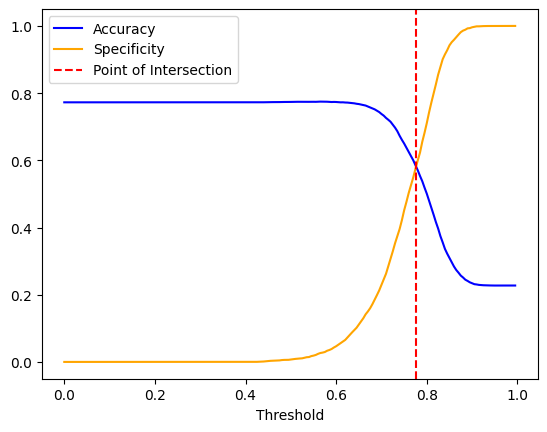

In [202]:
plt.plot(threshold, acc, c='blue', label='Accuracy')
plt.plot(threshold, spec, c='orange', label='Specificity')

new_threshold = 0.777
plt.axvline(new_threshold, color='red', ls='--', label='Point of Intersection')
plt.xlabel('Threshold')
plt.legend()
print('The threshold at which Accuracy and Specificity intersect is about {}.'.format(new_threshold))
plt.show()

---
# Warning!

Upload your complete notebook to the same place on OWL where you initially downloaded it. After uploading, click the "Submit for Grading" button and confirm. Late submissions are not allowed, so please start the submission process 10 minutes before the deadline. If your submission is successful, you should receive a confirmation email in your UWO inbox.